## Imports

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dependencies.plots import plot_bars, plot_hists
from dependencies.feature_selection import remover_colunas_constantes, \
                                             boruta_selector, variance_threshold_selector

%matplotlib inline

In [7]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_TRAIN_NAME = 'df_train.csv'
DATA_PROCE_TRAIN_NAME = 'df_train.csv'
DATA_INTER_PATH = os.path.join('..','data','interim')
DATA_INTER_PROCESSED = os.path.join('..', 'data', 'processed')
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [8]:
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME))
df_train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Exploração dos dados

D:\Dados\Documents\Data Science\Case DataRisk\case-datarisk\notebooks\dependencies\plots.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


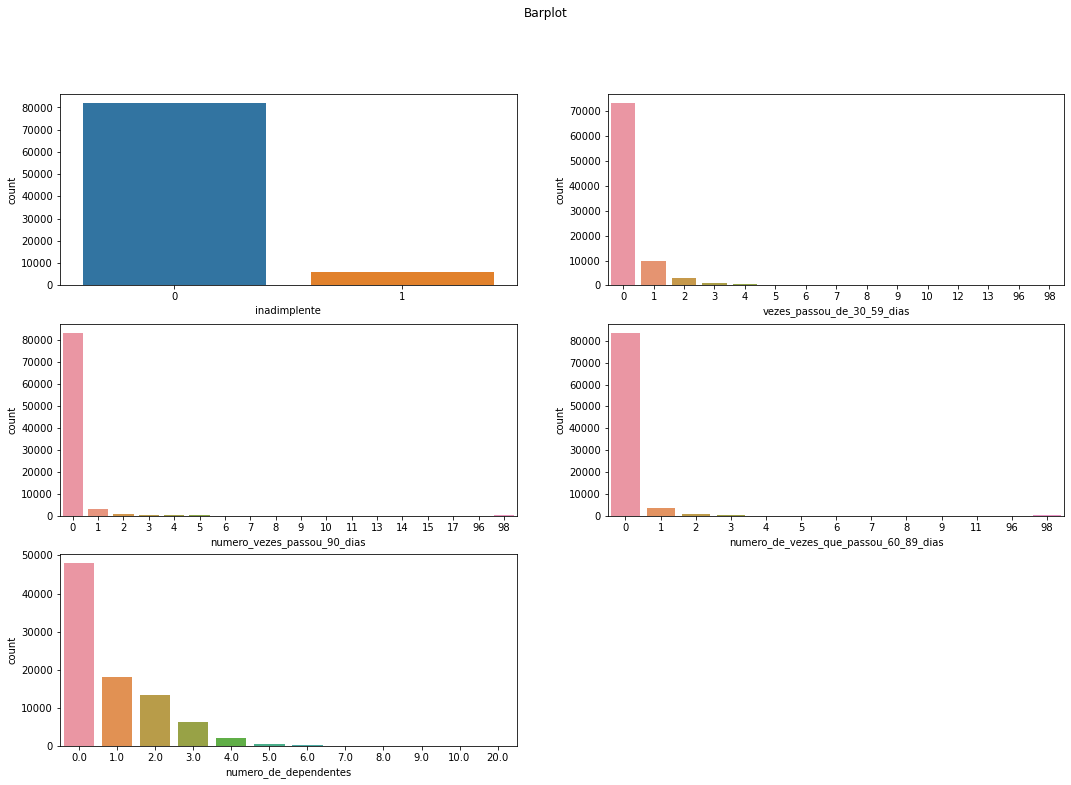

In [10]:
plot_bars(df_train, features=['inadimplente', 'vezes_passou_de_30_59_dias', 
                        'numero_vezes_passou_90_dias', 
                        'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'], 
          n_rows=3, n_cols=2, title='Barplot', figsize=(18,12))

plt.savefig(os.path.join(IMG_PATH,'alguns-barplots.png'), format='png')

D:\Dados\Documents\Data Science\Case DataRisk\case-datarisk\notebooks\dependencies\plots.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


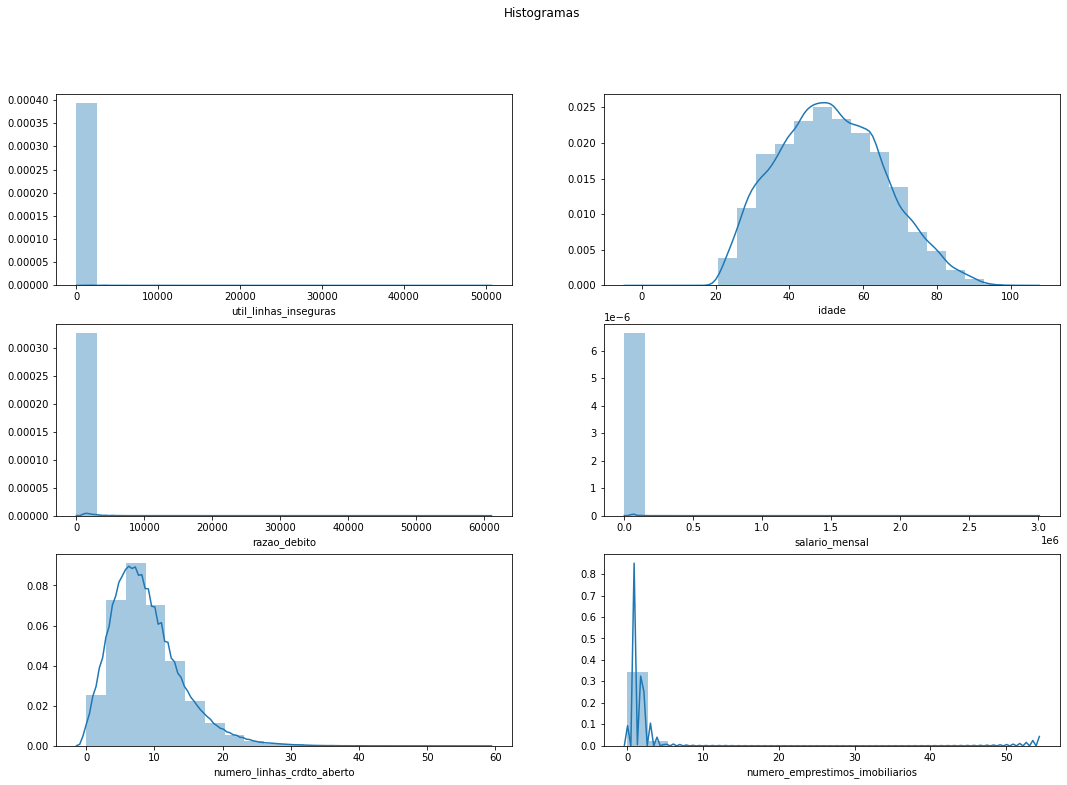

In [11]:
plot_hists(df_train, features=['util_linhas_inseguras', 'idade', 'razao_debito',
                               'salario_mensal', 'numero_linhas_crdto_aberto', 'numero_emprestimos_imobiliarios'],
           n_rows=3, n_cols=2, title='Histogramas', figsize=(18,12))
plt.savefig(os.path.join(IMG_PATH,'alguns-histo.png'), format='png')

In [12]:
df_train['idade'].sort_values().unique()

array([  0,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 101, 102, 103], dtype=int64)

In [13]:
ate_21 = list(range(0, 22))
entre_22_a_35 = list(range(22, 36))
entre_36_a_45 = list(range(36, 46))
entre_46_a_60 = list(range(46, 61))
entre_60_a_80 = list(range(61, 81))
de_80_a_110 = list(range(81, 111))

In [14]:
df_analise = df_train.copy()

In [15]:
df_analise['idade'].replace(ate_21, 'até_21', inplace=True)
df_analise['idade'].replace(entre_22_a_35, '22_a_35', inplace=True)
df_analise['idade'].replace(entre_36_a_45, '36_a_45', inplace=True)
df_analise['idade'].replace(entre_46_a_60, '46_a_60', inplace=True)
df_analise['idade'].replace(entre_60_a_80, '60_a_80', inplace=True)
df_analise['idade'].replace(de_80_a_110, '80_a_110', inplace=True)

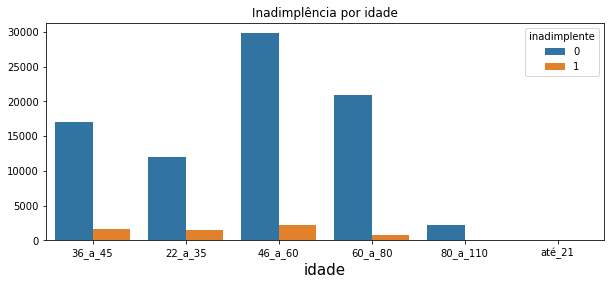

In [16]:
plt.figure(figsize=(10,4))
fig = sns.countplot(x='idade',data=df_analise,hue='inadimplente')
plt.xlabel('idade',size=15)
plt.ylabel('')
plt.title('Inadimplência por idade')
plt.savefig(os.path.join(IMG_PATH,'inadimplencia_por_idade.png'), format='png')
plt.show()

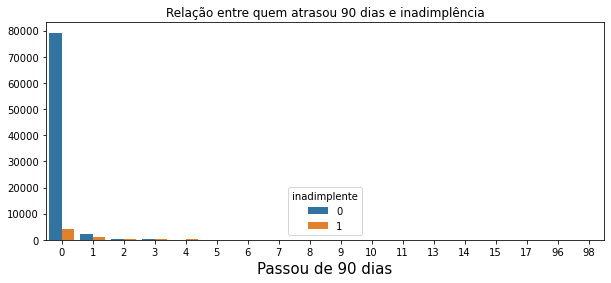

In [17]:
plt.figure(figsize=(10,4))
fig = sns.countplot(x='numero_vezes_passou_90_dias',data=df_analise,hue='inadimplente')
plt.xlabel('Passou de 90 dias',size=15)
plt.ylabel('')
plt.title('Relação entre quem atrasou 90 dias e inadimplência')
plt.savefig(os.path.join(IMG_PATH,'inadimplencia_por_90_dias.png'), format='png')
plt.show()

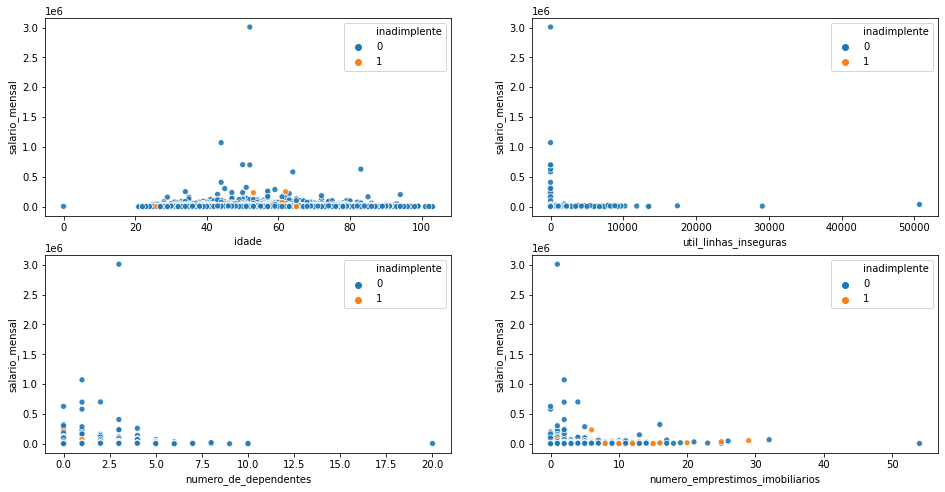

In [18]:
fig, ax = plt.subplots (2, 2, figsize = (16,8))

sns.scatterplot(x='idade', y='salario_mensal', data=df_train, hue='inadimplente', alpha=0.9, ax=ax[0,0])
sns.scatterplot(x='util_linhas_inseguras', y='salario_mensal', data=df_train, hue='inadimplente', alpha=0.9, ax=ax[0,1])
sns.scatterplot(x='numero_de_dependentes', y='salario_mensal', data=df_train, hue='inadimplente', alpha=0.9, ax=ax[1,0])
sns.scatterplot(x='numero_emprestimos_imobiliarios', y='salario_mensal', data=df_train, hue='inadimplente', alpha=0.9, ax=ax[1,1])


plt.savefig(os.path.join(IMG_PATH,'scatter_plot.png'), format='png')
plt.show()


# Features Select

In [19]:
customPal = sns.diverging_palette(100,0,74,39,19,2, center='dark')
cmap = sns.diverging_palette(0,100,74,39,19,25, center='light', as_cmap=True)

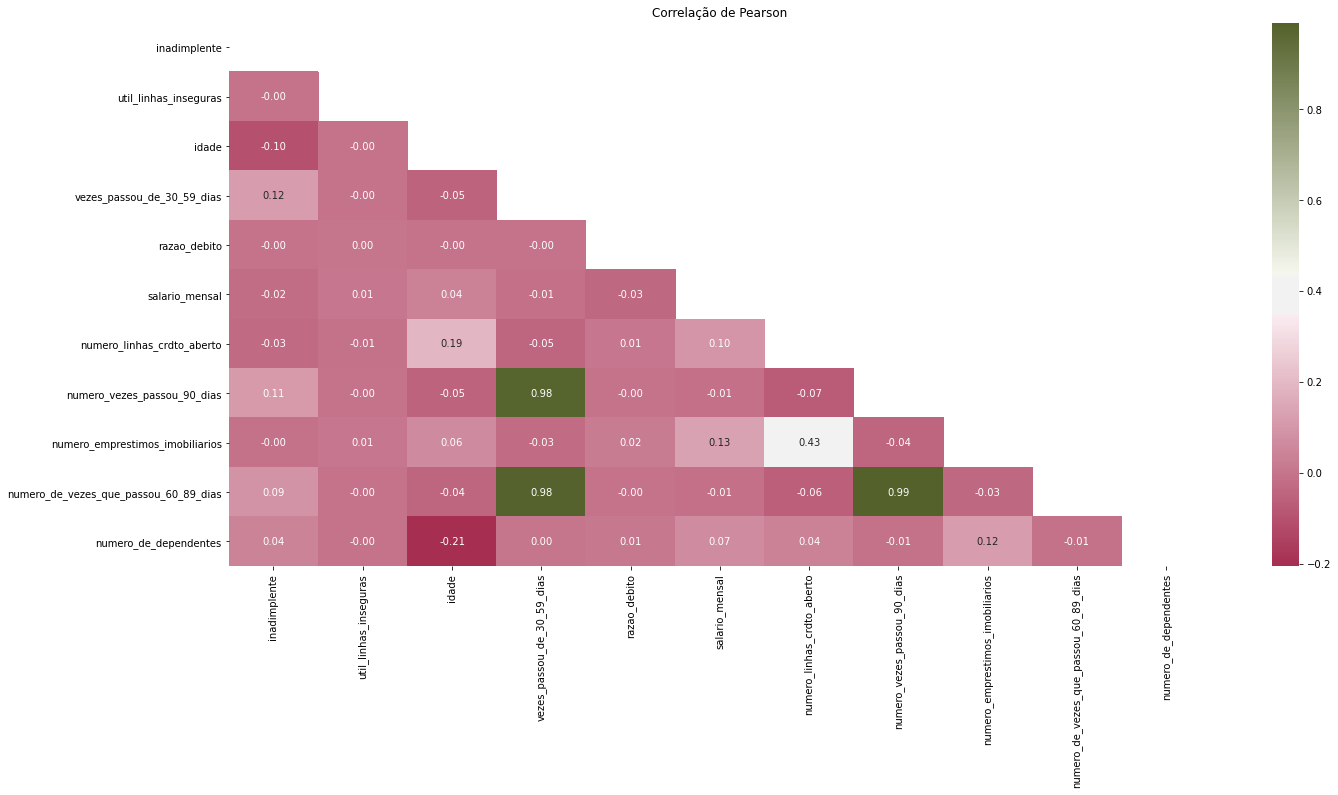

In [20]:
num_feat_corr = df_train.corr()
mask = np.triu(np.ones_like(num_feat_corr, dtype=np.bool))
plt.figure(figsize=(22, 10))
sns.heatmap(num_feat_corr, mask=mask,fmt='.2f', cmap=cmap, annot=True)
plt.title('Correlação de Pearson')

plt.savefig(os.path.join(IMG_PATH,'correlacao_pearson.png'), format='png')
plt.show()

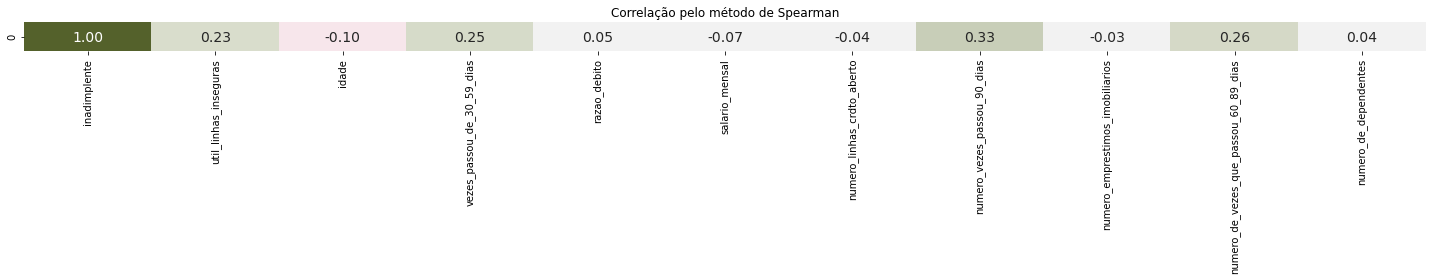

In [21]:
plt.figure(figsize=(20,4))
corrmat = df_train.corr(method='spearman')
sns.heatmap([corrmat['inadimplente']], xticklabels = corrmat.index,
            annot=True, fmt='.2f', annot_kws={'size': 14},
            cbar=False, center=0, cmap= cmap)
plt.title('Correlação pelo método de Spearman')

plt.savefig(os.path.join(IMG_PATH,'correlacao_spearman.png'), format='png')
plt.tight_layout()
plt.show()

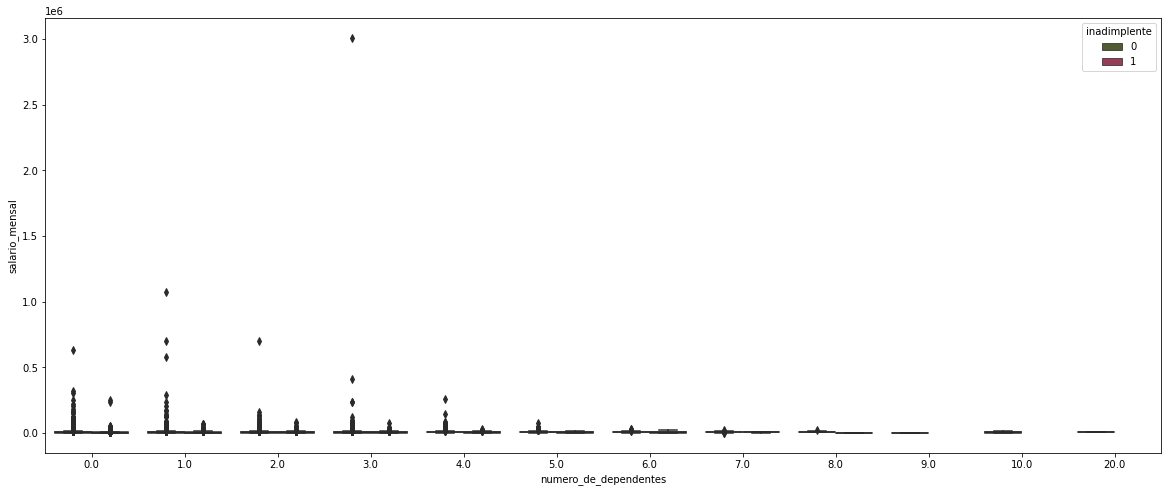

In [22]:
plt.figure(figsize=(20,8))
sns.boxplot(x='numero_de_dependentes', y='salario_mensal', hue='inadimplente', data=df_train, palette=customPal)

plt.savefig(os.path.join(IMG_PATH,'boxplot.png'), format='png')

## Eliminando Outliers

In [23]:
df_train_out = df_train.copy()

In [24]:
Q1 = df_train.drop(columns=['inadimplente', 'vezes_passou_de_30_59_dias', 'numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias']).quantile(0.25)
Q3 = df_train.drop(columns=['inadimplente', 'vezes_passou_de_30_59_dias', 'numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias']).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

util_linhas_inseguras                 0.547297
idade                                21.000000
razao_debito                          0.339194
salario_mensal                     4825.000000
numero_linhas_crdto_aberto            6.000000
numero_emprestimos_imobiliarios       2.000000
numero_de_dependentes                 2.000000
dtype: float64


In [25]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train> (Q3 + 1.5 * IQR))).any(axis=1)]

## Colunas constantes

In [26]:
df_train, const_cols = remover_colunas_constantes(df_train)

In [27]:
const_cols

[]

## Colunas Variância aprox = 0

In [28]:
variaveis_numericas = df_train.columns.tolist()

In [30]:
df_train = variance_threshold_selector(df_train.loc[:,variaveis_numericas], threshold=0.01)

## Correlação de Pearson

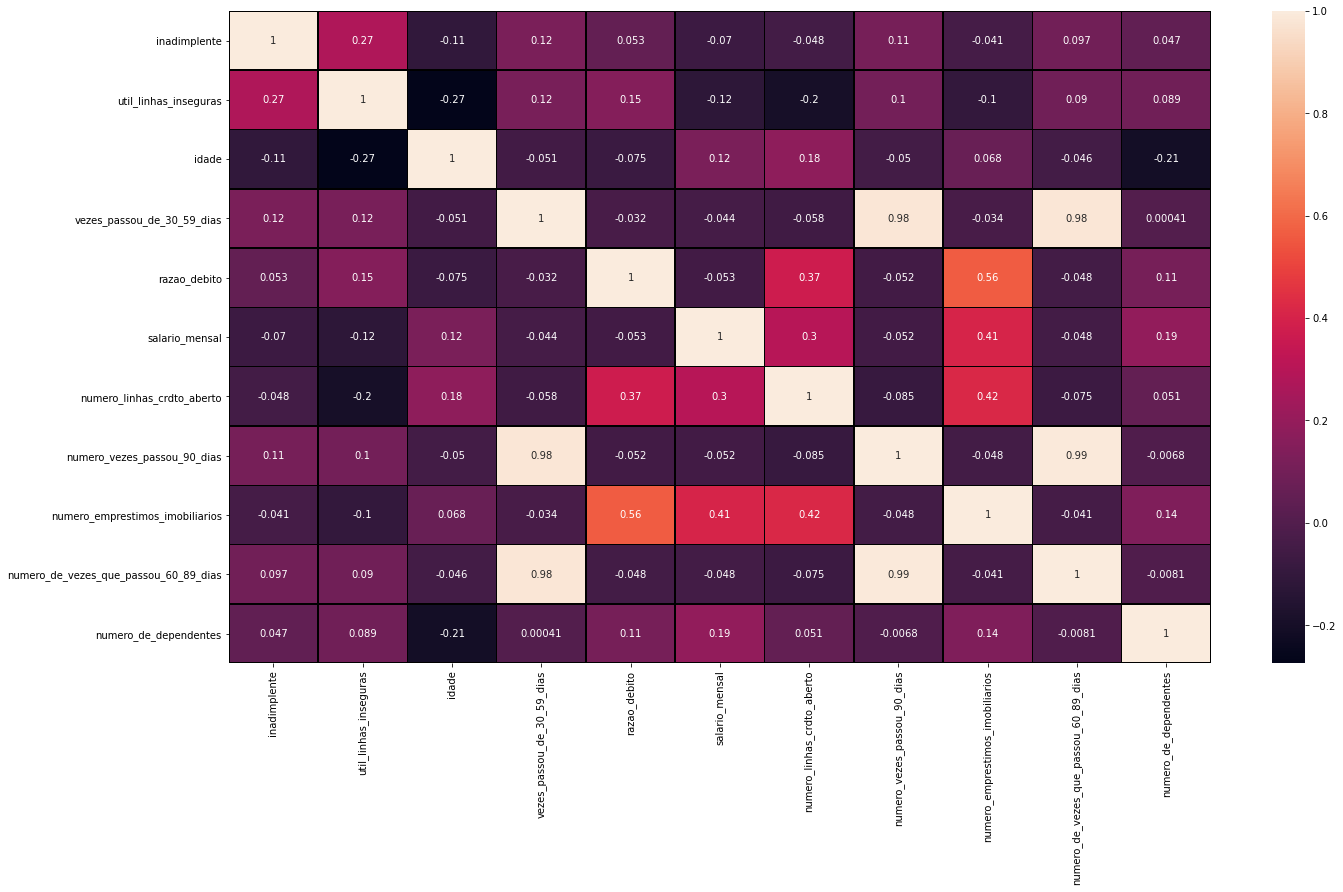

In [31]:
corr_matrix = df_train.corr()
plt.subplots(figsize=(22, 12))
sns.heatmap(corr_matrix,
            linecolor='black',
            linewidths=.5,
            annot=True,
            annot_kws={"fontsize":10})
plt.savefig(os.path.join(IMG_PATH,'correlacao_pearson_2.png'), format='png')
plt.show()

In [32]:
lista_correlacao = corr_matrix['inadimplente'].sort_values(axis=0,ascending=False).iloc[1:]
lista_correlacao = abs(lista_correlacao)

In [33]:
lista_descart_corr = lista_correlacao[lista_correlacao < 0.01].index.tolist()

In [34]:
lista_descart_corr

[]

## Boruta

In [35]:
list_to_drop_boruta = boruta_selector(df_train, y = 'inadimplente')

In [36]:
list_to_drop_boruta

[]

## Salvando dataset

In [39]:
df_train.drop(lista_drop_abordagem,axis=1).to_csv(os.path.join(DATA_INTER_PROCESSED, DATA_PROCE_TRAIN_NAME), index=False)
df_raw_test.to_csv(os.path.join(DATA_INTER_PROCESSED,DATA_INTER_TEST_NAME), index=False)

# Considerações

* Enfrentamos um problema onde o nosso target encontra-se desbalanceado.
* Percebe-se que o maior índice de inadimplência encontra-se na faixa de 22 a 60 anos.
* A idade dos clientes está entre 21 e 92 anos, no entanto, 75% da base tem abaixo de 61 anos.